In [9]:
# import library yang digunakan

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [10]:
# menentukan variabel semesta (variabel input dan output)

elevasi = np.arange(700, 1500, 1)
temp = np.arange(15, 40, 1)
kelembaban = np.arange(50, 100, 1)
curahhujan = np.arange(200, 400, 1)
indeks = np.arange(0, 50, 1)

In [11]:
# menentukan fungsi keanggotaan per-variabel

elevasi_rendah = fuzz.trapmf(elevasi, [700, 700, 800, 1000])
elevasi_sedang = fuzz.trimf(elevasi, [750, 1000, 1250])
elevasi_tinggi = fuzz.trapmf(elevasi, [1000, 1250, 1500, 1500])

temp_dingin = fuzz.trapmf(temp, [15, 15, 20, 22])
temp_sedang = fuzz.trimf(temp, [20, 22, 25])
temp_panas = fuzz.trapmf(temp, [22, 25, 40, 40])

kelembaban_rendah = fuzz.trapmf(kelembaban, [50, 50, 60, 70])
kelembaban_sedang = fuzz.trimf(kelembaban, [60, 70, 75])
kelembaban_tinggi = fuzz.trapmf(kelembaban, [70, 75, 100, 100])

curahhujan_rendah = fuzz.trapmf(curahhujan, [200, 200, 225, 250])
curahhujan_sedang = fuzz.trimf(curahhujan, [225, 250, 300])
curahhujan_tinggi = fuzz.trapmf(curahhujan, [250, 300, 400, 400])

indeks_low = fuzz.trapmf(indeks, [0, 0, 15, 25])
indeks_medium = fuzz.trimf(indeks, [15, 25, 35])
indeks_high = fuzz.trapmf(indeks, [25, 35, 50, 50])

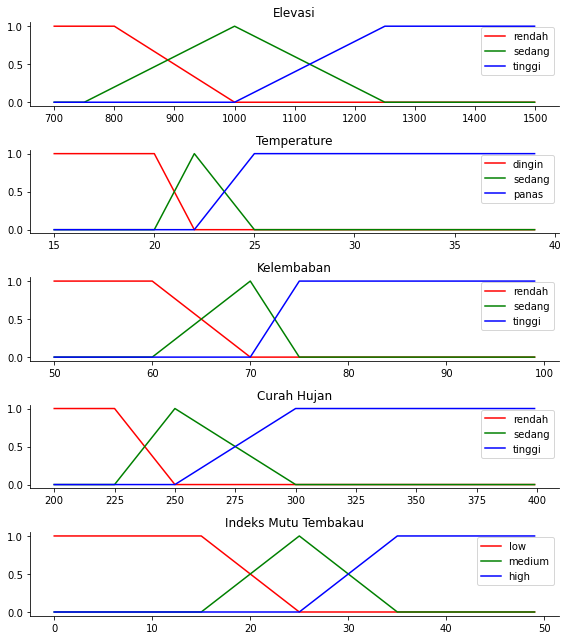

In [58]:
# visualisasi fungsi keanggotaan

fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, figsize=(8, 9))

ax0.plot(elevasi, elevasi_rendah, 'r', linewidth=1.5, label='rendah')
ax0.plot(elevasi, elevasi_sedang, 'g', linewidth=1.5, label='sedang')
ax0.plot(elevasi, elevasi_tinggi, 'b', linewidth=1.5, label='tinggi')
ax0.set_title('Elevasi')
ax0.legend()

ax1.plot(temp, temp_dingin, 'r', linewidth=1.5, label='dingin')
ax1.plot(temp, temp_sedang, 'g', linewidth=1.5, label='sedang')
ax1.plot(temp, temp_panas, 'b', linewidth=1.5, label='panas')
ax1.set_title('Temperature')
ax1.legend()

ax2.plot(kelembaban, kelembaban_rendah, 'r', linewidth=1.5, label='rendah')
ax2.plot(kelembaban, kelembaban_sedang, 'g', linewidth=1.5, label='sedang')
ax2.plot(kelembaban, kelembaban_tinggi, 'b', linewidth=1.5, label='tinggi')
ax2.set_title('Kelembaban')
ax2.legend()

ax3.plot(curahhujan, curahhujan_rendah, 'r', linewidth=1.5, label='rendah')
ax3.plot(curahhujan, curahhujan_sedang, 'g', linewidth=1.5, label='sedang')
ax3.plot(curahhujan, curahhujan_tinggi, 'b', linewidth=1.5, label='tinggi')
ax3.set_title('Curah Hujan')
ax3.legend()

ax4.plot(indeks, indeks_low, 'r', linewidth=1.5, label='low')
ax4.plot(indeks, indeks_medium, 'g', linewidth=1.5, label='medium')
ax4.plot(indeks, indeks_high, 'b', linewidth=1.5, label='high')
ax4.set_title('Indeks Mutu Tembakau')
ax4.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2, ax3, ax4):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

masukkan ketinggian tempat (0-1500 Mdpl) =1500
masukkan suhu rata-rata (15-40 C) =15
masukkan kelembaban rata-rata tempat (50-100 %) =100
masukkan nilai curah hujan tempat (200-400 mm) =200


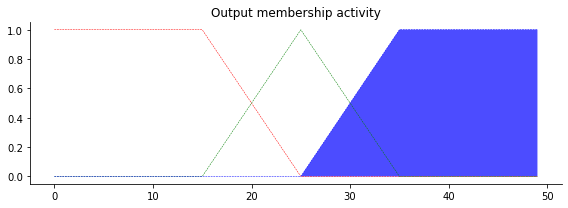

In [63]:
# simulasi input prediksi dan rule fuzzy

inp_ele = float(input('masukkan ketinggian tempat (0-1500 Mdpl) ='))
inp_temp = float(input('masukkan suhu rata-rata (15-40 C) ='))
inp_kel = float(input('masukkan kelembaban rata-rata tempat (50-100 %) ='))
inp_ch = float(input('masukkan nilai curah hujan tempat (200-400 mm) ='))

ele_lvl_rd = fuzz.interp_membership(elevasi, elevasi_rendah, inp_ele)
ele_lvl_sd = fuzz.interp_membership(elevasi, elevasi_sedang, inp_ele)
ele_lvl_tg = fuzz.interp_membership(elevasi, elevasi_tinggi, inp_ele)

temp_lvl_dg = fuzz.interp_membership(temp, temp_dingin, inp_temp)
temp_lvl_sd = fuzz.interp_membership(temp, temp_sedang, inp_temp)
temp_lvl_pn = fuzz.interp_membership(temp, temp_panas, inp_temp)

kel_lvl_rd = fuzz.interp_membership(kelembaban, kelembaban_rendah, inp_kel)
kel_lvl_sd = fuzz.interp_membership(kelembaban, kelembaban_sedang, inp_kel)
kel_lvl_tg = fuzz.interp_membership(kelembaban, kelembaban_tinggi, inp_kel)

ch_lvl_rd = fuzz.interp_membership(curahhujan, curahhujan_rendah, inp_ch)
ch_lvl_sd = fuzz.interp_membership(curahhujan, curahhujan_sedang, inp_ch)
ch_lvl_tg = fuzz.interp_membership(curahhujan, curahhujan_tinggi, inp_ch)

rule1 = np.fmax(ele_lvl_rd, temp_lvl_pn)
rule2 = np.fmax(kel_lvl_rd, ch_lvl_sd)
rule3 = np.fmax(ele_lvl_sd, temp_lvl_sd)
rule4 = np.fmax(kel_lvl_sd, ch_lvl_tg)
rule5 = np.fmax(ele_lvl_tg, temp_lvl_dg)
rule6 = np.fmax(kel_lvl_tg, ch_lvl_rd)

indeks_act_low = np.fmin(rule1, indeks_low) 
indeks_act_low = np.fmin(rule2, indeks_low) 
indeks_act_med = np.fmin(rule3, indeks_medium)
indeks_act_med = np.fmin(rule4, indeks_medium)
indeks_act_high = np.fmin(rule5, indeks_high)
indeks_act_high = np.fmin(rule6, indeks_high)

indeks0 = np.zeros_like(indeks)



fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(indeks, indeks0, indeks_act_low, facecolor='r', alpha=0.7)
ax0.plot(indeks, indeks_low, 'r', linewidth=0.5, linestyle='--', )

ax0.fill_between(indeks, indeks0, indeks_act_med, facecolor='g', alpha=0.7)
ax0.plot(indeks, indeks_medium, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(indeks, indeks0, indeks_act_high, facecolor='b', alpha=0.7)
ax0.plot(indeks, indeks_high, 'b', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

 dari data yang dimasukkan, didapatkan mutu tembakau dengan nilai indeks sebesar
 39.28070175438596 (dari rentang (0-50))


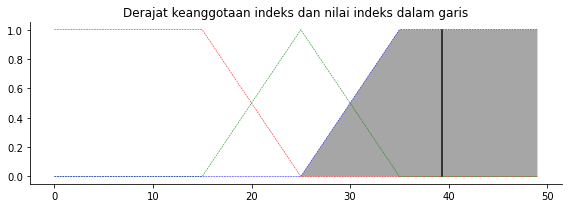

In [64]:
# gabungan dari fungsi output
gabungan = np.fmax(indeks_act_low,
                     np.fmax(indeks_act_med, indeks_act_high))

# perhitungan indeks mutu tembakau
mutu = fuzz.defuzz(indeks, gabungan, 'centroid')
indeks_activation = fuzz.interp_membership(indeks, gabungan, mutu)

# Visualisasi Fuzzy
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(indeks, indeks_low, 'r', linewidth=0.5, linestyle='--', )
ax0.plot(indeks, indeks_medium, 'g', linewidth=0.5, linestyle='--')
ax0.plot(indeks, indeks_high, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(indeks, indeks0, gabungan, facecolor='grey', alpha=0.7)
ax0.plot([mutu, mutu], [0, indeks_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Derajat keanggotaan indeks dan nilai indeks dalam garis')


for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
print (' dari data yang dimasukkan, didapatkan mutu tembakau dengan nilai indeks sebesar\n',mutu, '(dari rentang (0-50))')